# Asset Pricing, Lucas Trees, and Options

Undergraduate Computational Macro

Jesse Perla (University of British Columbia)

# Overview

## Motivation

-   We have used asset pricing examples as practice in dynamic programming and EPDVs, but have not explored the economics of these models
-   In the [Permanent Income Model](permanent_income.qmd#/title-slide) lectures we analyzed the role of intertemporal smoothing and risk-aversion in helping consumers smooth consumption.
-   Here, rather than considering an exogenous interest rate we will consider where asset prices should come from in a general equilibrium model
    -   We will follow a variation of [Lucas (1978)](https://julia.quantecon.org/zreferences.html#id102) and build connections to [Harrison and Kreps (1979)](https://julia.quantecon.org/zreferences.html#id42) and [Hansen and Richard (1987)](https://julia.quantecon.org/zreferences.html#id43)

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and Thomas J. Sargent
    -   [Asset Pricing I: Finite State Models](https://julia.quantecon.org/multi_agent_models/markov_asset.html)
    -   [Asset Pricing II: The Lucas Asset Pricing Model](https://julia.quantecon.org/multi_agent_models/lucas_model.html)

In [1]:
using LinearAlgebra, Statistics
using Distributions, LaTeXStrings, QuantEcon
using Plots.PlotMeasures, NLsolve, Roots, Random, Plots
default(;legendfontsize=16, linewidth=2, tickfontsize=12,
         bottom_margin=15mm)

# Review of Preferences

## Period Utility

-   **Notation warning:** will occasionally use derivatives, such as the utility $u'(c)$ we mean derivative, but in other cases we will use write the problem recursively and reserve $c'$ for the next period notation
    -   Confusing at first, but you will see it used often in macroeconomics
-   Consider utility which is strictly concave where:
    -   $u'(c) > 0$: More is better
    -   $u''(c) \leq 0$: (Weakly) Diminishing Marginal Utility
-   Examples include
    -   $u(c) = \log(c)$ and $u(c) = \frac{c^{1-\gamma}}{1-\gamma}$ for $\gamma > 0$
    -   If $u''(c) = 0$ then we have a linear utility function, $u(c) \propto c$ and $u'(c)$ is constant

## Strictly Concave Utility

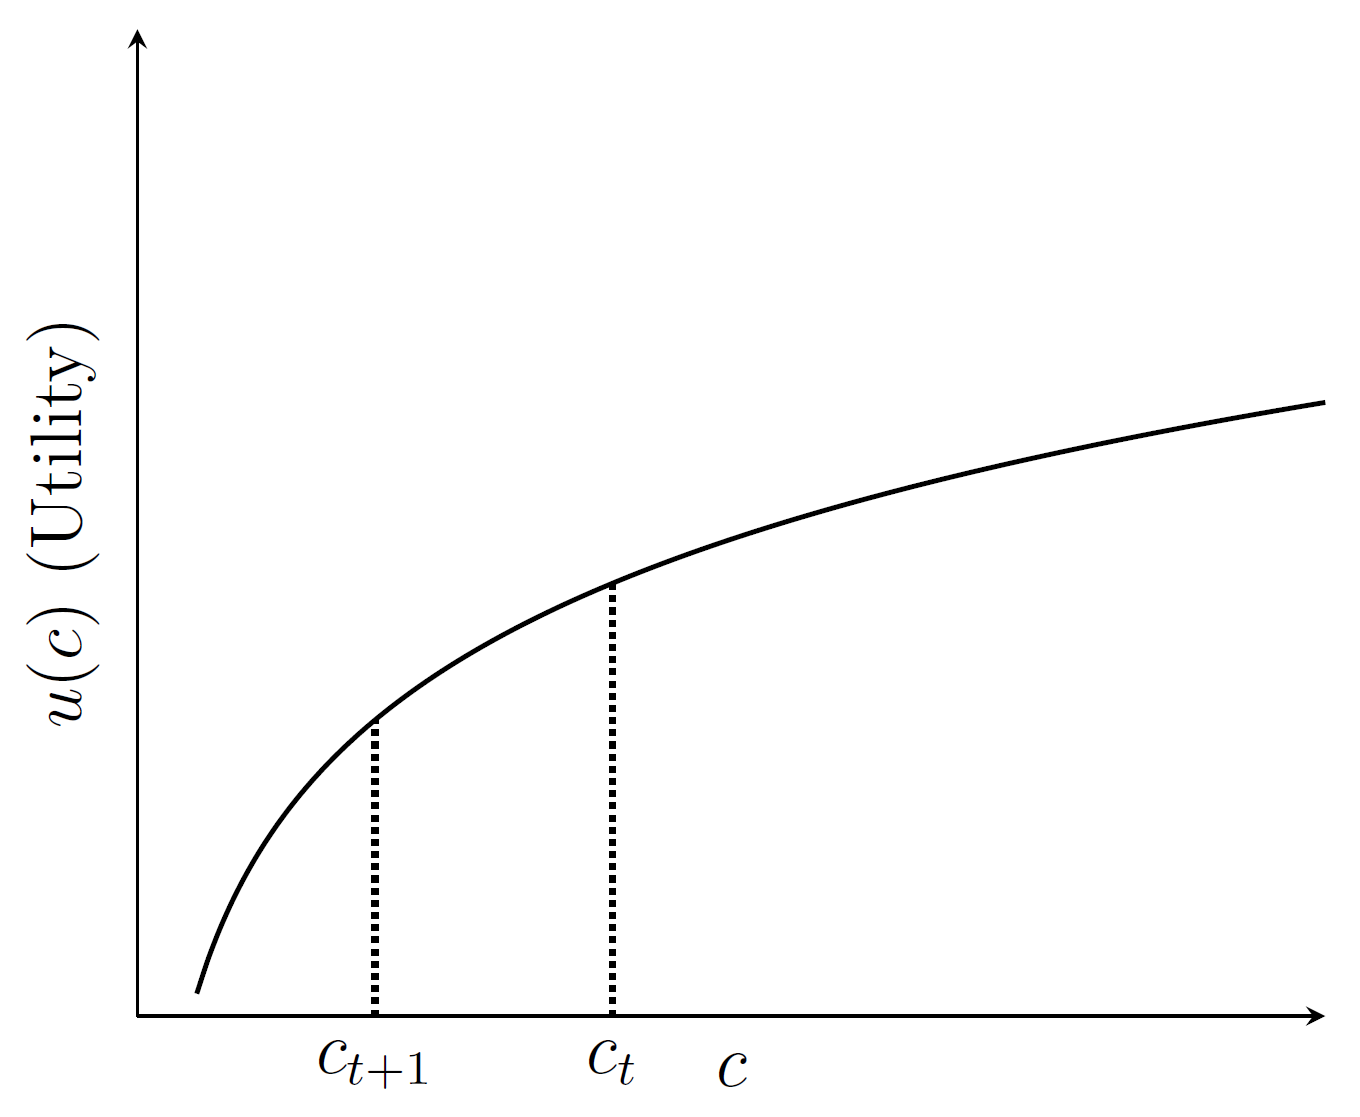

-   Positive Marginal Utility of Consumption
-   Diminishing Returns
-   No (visible, at least) point of satiation

## Marginal Utility

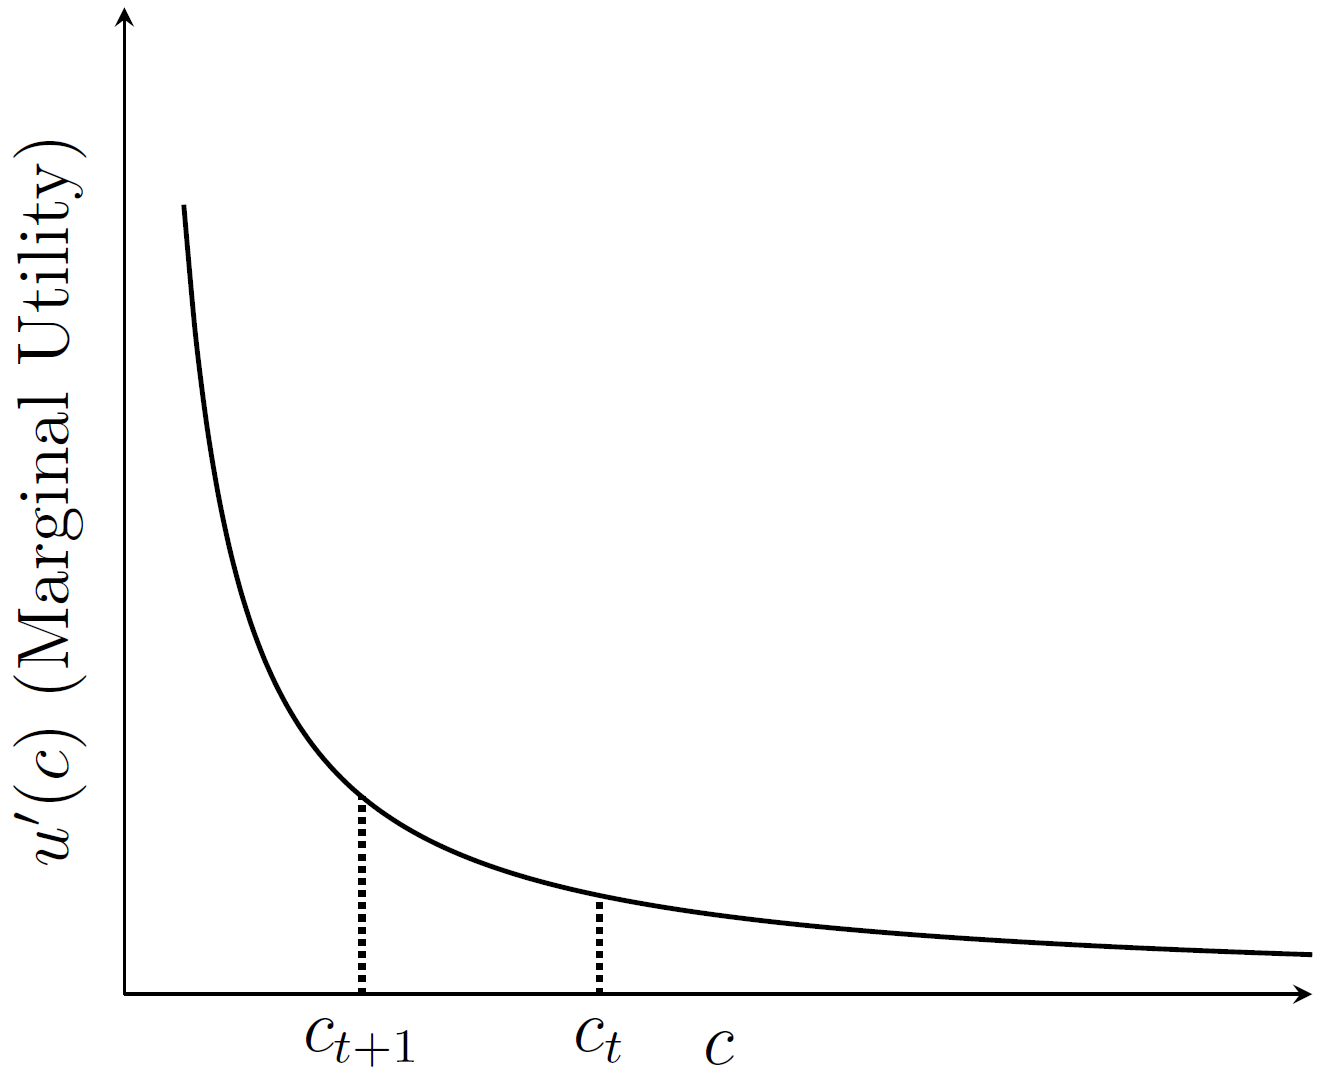

-   $u'(c) > 0$ but decreasing $u''(c) < 0$
-   $u'(c_1) = u'(c_2)\implies c_1 = c_2$
-   If $u'(c_t) < u'(c_{t+1})$ then $c_t > c_{t+1}$
-   The less they consume, the more valuable additional consumption in that period would be

## Uncertainty

-   What if the agent does not know $\{c_t\}_{t=0}^\infty$ because it is random or uncertain?

-   In that case, we can instead have the agent compare expected utility streams

    $$
    \mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j u(c_{t+j})\right]
    $$

    -   Where $\mathbb{E}_t[\cdot] \equiv \mathbb{E}[\cdot|I_t]$ with $I_t$ the information set we make available at time $t$ for forecasting in our model
    -   This uses our model of expectation formation from the [previous lecture](linear_state_space_models.qmd#/models-of-expectations)

## Risk Aversion vs. Inter-temporal Substitution

-   If $u(c)$ is strictly concave the agent:
    -   **Risk Averse:** Prefers more deterministic consumption to those with a higher variance
    -   **Preferences for Consumption Smoothing:** Will substitute between time periods rather than smoother consumption over time rather than large fluctuations
-   One challenge in macroeconomics with these preferences is that the $u(c)$ serves both purposes, which have different economic interpretations.
    -   To disentangle, can use recursive preferences such as [Epstein-Zin](https://en.wikipedia.org/wiki/Epstein%E2%80%93Zin_preferences) which decouple these two concepts

## Smoothing Incentives

-   Consider a simpler case where they live for two periods and don’t discount the future: $V(c_1, c_2) \equiv u(c_1) + u(c_2)$
-   Consider two possible bundles: $\{c_t, c_{t+1}\}$ and $\{\bar{c}, \bar{c}\}$ where $c_t + c_{t+1} = 2 \bar{c}$
-   If the agent is risk-neutral, we see that $V(c_t, c_{t+1}) = V(\bar{c}, \bar{c})$
-   However, if the agent if risk-averse, then $$
    V(c_t, c_{t+1}) < V(\bar{c}, \bar{c})\quad \text{unless }c_t = c_{t+1} = \bar{c}
    $$
    -   They strictly prefer smoother consumption over time
    -   i.e., would forgo consumption on average to gain smoother consumption

## Smoothing and Concavity

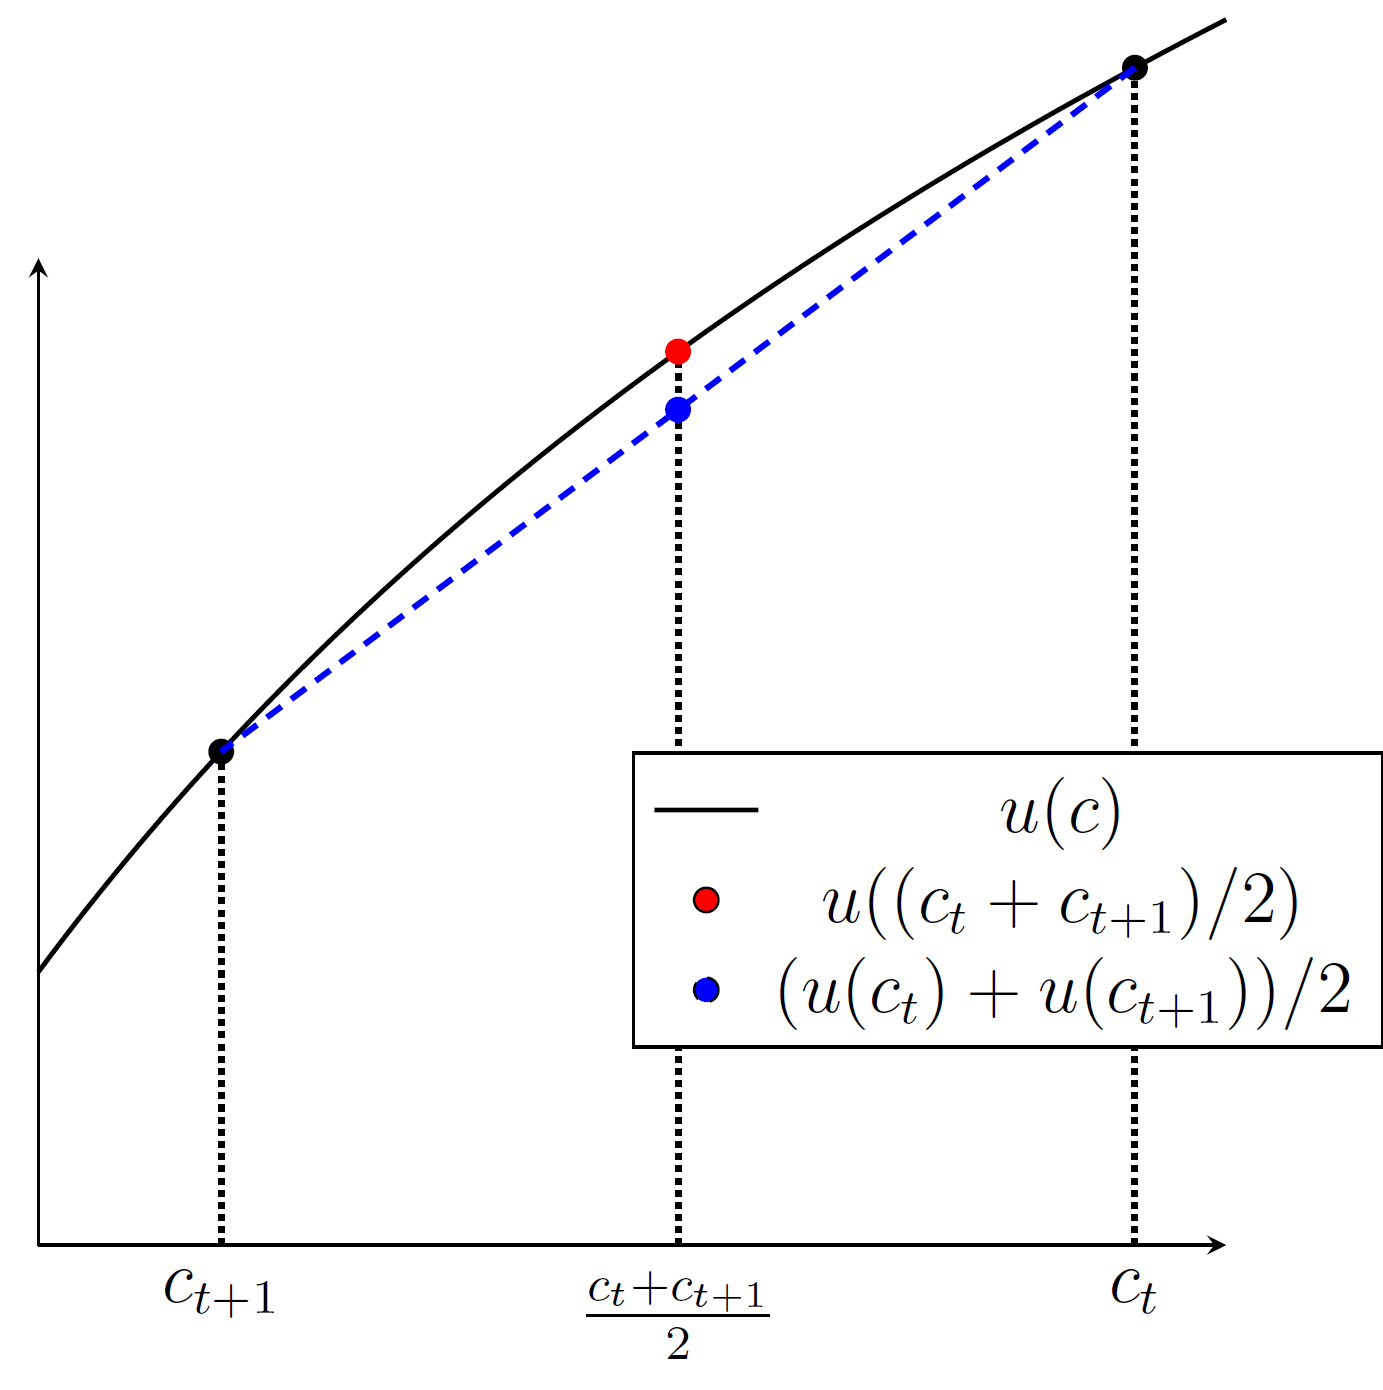

-   Recall $\bar{c} \equiv (c_t + c_{t+1})/2$
-   2 periods, $\beta = 1$
-   Same “price” for $c_t$ and $c_{t+1}$
-   Two possible bundles:
    1.  $\{c_t, c_{t+1}\}$
    2.  $\{\bar{c}, \bar{c}\}$
-   Later, $\beta$ and prices will simply distort this exact tradeoff

## Risk-Aversion Intuition

-   Consider a utility $u(c)$ and a lottery which is a random variable

    -   $C = \begin{cases} c_L & \text{with probability } \frac{1}{2} \\ c_H & \text{with probability } \frac{1}{2} \end{cases}$
    -   Let $(c_L + c_H)/2 = \bar{c}$
    -   We can form expected utility as $\mathbb{E}[u(C)] = \frac{1}{2} u(c_L) +\frac{1}{2} u(c_H)$

-   Note if risk-neutral then $\mathbb{E}[C] = \frac{1}{2} c_L + \frac{1}{2}c_H = \bar{c} = u(\bar{c})$

-   Then if an agent is risk-averse, $$
    u(\mathbb{E}(C)) > \mathbb{E}[u(C)]
    $$

    -   i.e., would forgo consumption on average to avoid the risk

## Risk Aversion and Concavity

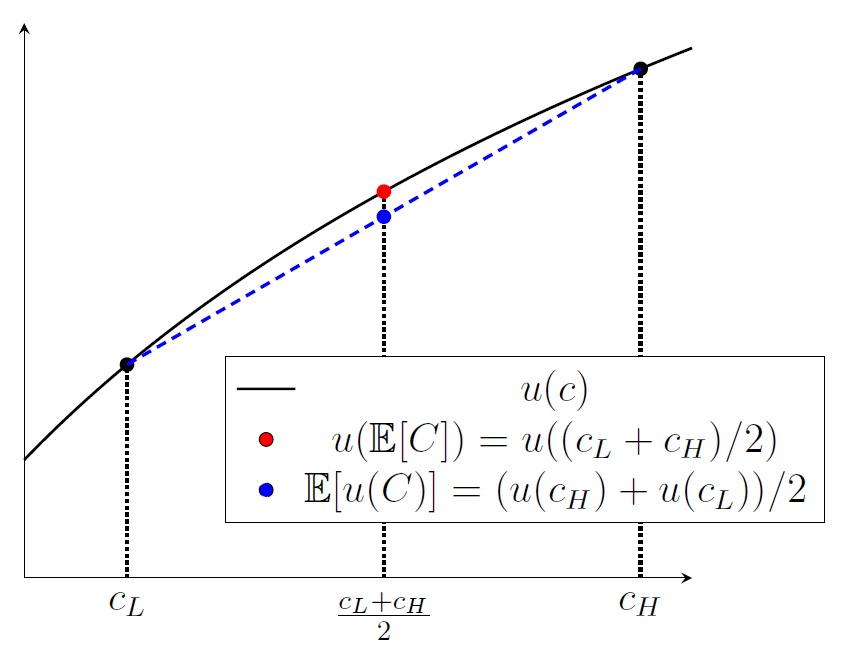

-   Interpretation as fair, risk-neutral prices for lotteries
-   Then compare choice between lotteries:
    1.  $\mathbb{E}[u(C)] \equiv \frac{1}{2} u(c_L) + \frac{1}{2} u(c_2)$
    2.  $u(\mathbb{E}(C)) = u(\frac{1}{2} c_L + \frac{1}{2} c_H)$
-   The strict concavity of $u(c)$ shows you are better off with the deterministic consumption

# Consumption Based Asset Pricing

## Why Study This Problem?

-   Macro-finance and financial economics $\neq$ pure finance. Different goals and questions, though sometimes common tools
-   If you are interested in macro-finance, then this is the core theory of aggregate asset prices (“consumption-based asset pricing”)
-   Even if you do not care about macro-finance or financial economics, macroeconomists need to understand asset prices because they are tightly connected to models of saving and investment
-   Finally, if you have a model of asset pricing you can use it to invert consumer expectations of the economy from empirical asset prices
    -   e.g., the yield cure (i.e., prices bonds of different maturity) can be used to infer the market’s expectations of future GDP growth

## General Equilibrium for Asset Markets

-   General Equilibrium (GE) refers to a model where all markets clear simultaneously. Supply equals demand, which determines the price
-   The simplest models of asset pricing should have prices such as that of bonds, equities, insurance contracts, etc. determined by the same forces
-   Agents might want to purchase assets in order to
    -   Delivery in the future where they expect to want more consumption relative to today (i.e. $u'(c_{t+j}) > u'(c_t)$ after discounting by $\beta^j$, etc.)
    -   Delivery in states of the world to hedge against bad outcomes. For example, if they think there is a 50% chance of a bad outcome, they might want to purchase an asset that pays off in that state to smooth consumption - even if it may decrease their average consumption today

## Exchange Economies

-   The simplest models to understand asset prices are when the “endowments” are exogenous (i.e., the amount of goods each agent cannot be changed by their behavior)
-   Then, there may be gains from trade if different agents get their endowments in different states of the world or at different times.
    -   e.g., the young may have more endowments relative to the retired
    -   e.g., employed have endowments at different times than unemployed
-   If agents are able to trade these exogenous endowments we call it a “pure exchange economy”

## Representative Consumers

-   Since we will be looking at prices emerging from supply and demand, it is important to be clear when agents are competitive vs. can exert market power
-   We will assume that no individuals have large enough endowments relative to each other that they can unilaterally affect prices of traded assets
-   It turns out that if we assume agents have identical preferences and there are complete markets for smoothing consumption, we can solve the model with a single **representative agent** to get the same (aggregate) results
    -   The “endowments” of the representative agent are the sum of the endowments of all agents, i.e. the aggregate endowments
    -   Using a representative agent is an **aggregation result** given particular assumptions on primitives, not an assumption itself

## Supply of Goods

-   In the simplest version, think of there being a “tree” which produces a random stream of fruit each period.

    -   We are using “fruit” instead of dollars because it is important to consider that this is a physical good, not just a nominal value

-   The random sequence of consumption goods (fruit) is $\{d_t\}_{t=0}^{\infty}$

-   Let the process determining the fruit be Markov, where for some $w_{t+1}$ iid

    $$
    d_{t+1} = h(d_t, w_{t+1})
    $$

    -   Since Markov, could also write $d' = h(d, w)$ for IID $w$

-   Assume the “fruit” is **not storable**

## Preferences

-   At time $t$ the consumer has preferences $$
    \mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j u(c_{t+j})\right]
    $$
    -   For now, assume that $u(\cdot)$ is strictly concave, but we will consider cases where it is not in the limit (e.g., $\lim_{\gamma \to 0} \frac{c^{1-\gamma}}{1-\gamma} = c$)
-   We will solve a competitive equilibrium were the consumer buys and sells claims to the fruit of the tree (i.e., assets) to smooth consumption

## Prices and Claims

-   Let $p_t$ = price of a claim to the fruit of the tree at time $t$ giving the right to
    -   Claim a unit share of the fruit that falls at time $t$
    -   Sell that claim in time $t$ or $t+1$, where the (equilibrium) price will be forecast at $p_{t+1}$ given time $t$ information
-   If $d_t$ is varying this is “equity” rather than a bond, because there is no guarantee of how many pieces of fruit will fall at that time
-   Let the state variable of the firm be $\pi_t$ which is the number of claims to the fruit of the tree they own at time $t$

## Budget Constraint

-   Normalize the price of fruit to $1$ at each time period, so $p_t$ is in real terms
    -   Think of this as spot markets for the fruit which we use as a price level
-   The consumer has $\pi_t$ claims to the tree, which delivers $\pi_t d_t$ pieces of fruit
    -   They can sell the fruit for $\pi_t d_t \times 1$
    -   They can sell the claim itself for $p_t \pi_t$
-   They may want to:
    -   Purchase $(c_t - \pi_t d_t)$ additional fruit at price $1$
    -   Change the number of future claims by purchasing (or selling) $(\pi_{t+1} - \pi_t)$ claims at price $p_t$
-   Putting together, the budget constraint is: $c_t + p_t \pi_{t+1} = \pi_t (d_t + p_t)$

## Consumers Problem

-   The agent is a **price taker** at $p_t$ (i.e., this is a competitive equilibrium)

-   State: $\pi_t$ and $d_t$ (and information sets for $d_{t+j}$ and $p_{t+j}$ forecasts)

-   Taking prices as given, the consumer solves

    $$
    \begin{aligned}
    \max_{\{c_{t+j}, \pi_{t+j+1}\}_{j=0}^{\infty}} &\mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j u(c_{t+j})\right]\\
    \text{s.t. }& c_{t+j} + p_{t+j} \pi_{t+j+1} = \pi_{t+j} (d_{t+j} + p_{t+j}),\text{ for all }j\geq 0\\
    \end{aligned}
    $$

    -   The first order conditions for this problem will yield a demand function claims to the the fruit tree and the fruit itself

-   If $d_t$ is Markov, we can write this problem recursively as a Bellman equation

## Dynamic Programming

-   Let the Markov price be $p(d)$, then the Bellman equation for the consumer is

    $$
    \begin{aligned}
    V(\pi, d) &= \max_{c, \pi'}\left[u(c) + \beta \mathbb{E}[V(\pi', d') | d]\right]\\
    \text{s.t. }& c + \pi'p(d) = \pi (d + p(d))
    \end{aligned}
    $$

    -   They forecast $d'$ and $p(d')$ based on their information set

-   Substituting the budget constraint into the Bellman equation

    $$
    V(\pi, d) = \max_{\pi'}\big[u(\underbrace{\pi(d + p(d)) - \pi'p(d)}_{c(\pi, \pi', d)}) + \beta \mathbb{E}[V(\pi', d') | d]\big]
    $$

## Euler Equation

-   Take the $\partial_{\pi'}$ of the Bellman equation

    $$
    0 = -p(d) u'(\pi(d + p(d)) - \pi'p(d)) + \beta \mathbb{E}[\partial_{\pi}V(\pi', d') | d]
    $$

-   Next the [envelope theorem](https://en.wikipedia.org/wiki/Envelope_theorem) tells us how the value function changes with respect to the state variable $\pi$ $$
    \partial_{\pi}V(\pi, d) = u'(c)(d + p(d))
    $$

-   Use $c = \pi(d + p(d)) - \pi'p(d)$, and $d' = h(d, w)$ for $\mathbb{E}[\cdot]$

    $$
    p(d) = \mathbb{E}\left[\beta \frac{u'(c')}{u'(c)}(d' + p(d')) \bigg| d\right]
    $$

## Consumption in Equilibrium

-   This is the celebrated **consumption-based asset pricing equation**

    $$
    p(d) = \mathbb{E}\bigg[\underbrace{\beta \frac{u'(c')}{u'(c)}}_{m(c,c')}(d' + p(d')) \bigg| d\bigg]
    $$

    -   Includes properties specific to the asset (e.g., $p(d)$ and $d$)
    -   Includes consumers’ preferences and process for consumption. Collect into $m(c,c')$ the **stochastic discount factor**(SDF)

-   If the consumer’s consumption is tightly connected to the fruit of this particular asset, then there may be a correlation between $c$ and the $d$ and hence between $m(c,c')$ and $d' + p(d')$

## Sequential Notation

-   In that case, lets directly use the $m_{t+1}$ has a stochastic process

-   It could have any correlation with a particular $d_{t+1}$ process

    -   In fact, maybe being negatively correlated is a good thing for smoothing risks?

-   In that notation, the asset pricing equation is

    $$
    p_t = \mathbb{E}_t\left[m_{t+1} (d_{t+1} + p_{t+1})\right]
    $$

    -   However, this is just notation and we can switch for convenience

-   Note that the first payoff of the “dividend” occurs at $t+1$. This is called **ex-dividend** pricing

## Reminder: Permanent Income Model

-   In the permanent income model, the consumer could purchase a 1-period riskless asset which paid $1$ with certainty.
    -   Extending so the price of the risk-free asset might change as $R_t$
-   The **Euler Equation** $$
    \begin{aligned}
    u'(c_t) &= \beta R_t\, \mathbb{E}_t[u'(c_{t+1})]\\
    p_t^{RF} \equiv \frac{1}{R_t} &= \mathbb{E}_t\left[\beta \frac{u'(c_{t+1})}{u'(c_t)}\right]
    \end{aligned}
    $$
    -   Converts gross interest rate $R_t$ to a price on 1 period asset $p_t^{RF}$

## Connecting to the Asset Pricing Formula

-   Back to our current setup. Since the risk-free asset has no future claims, $p^{RF}_{t+1} = 0$ and since it is risk-free the $d_{t+1} = 1$ $$
    \begin{aligned}
    p^{RF}_t &= \mathbb{E}_t\left[m_{t+1} (d_{t+1} + p^{RF}_{t+1})\right]\\
    p^{RF}_t &= \mathbb{E}_t\left[m_{t+1}(1 + 0)\right]\\
    &= \mathbb{E}_t\left[\beta \frac{u'(c_{t+1})}{u'(c_t)}\right] =  \frac{1}{R_t}
    \end{aligned}
    $$
    -   Previously: Given an $R_t$, find $c_t, c_{t+1}$
    -   Now: Given the $c_t, c_{t+1}$, could we find the $R_t$ that would reconcile the asset pricing equation with consumer’s optimality?

# Aggregate Endowment and Complete Markets

## Example: Claim to the Aggregate Endowment

-   Consider if the tree is the full output of the economy
    -   Interpretation: a claim to real GDP per capita
-   In that case, the
    -   demand is determined by the asset pricing equation
    -   supply is inelastic (since it is an endowment)
-   Market clearing requires that $c = d$ for all states
-   Substitute into the equation to get the price of a claim to the aggregate endowment (e.g., a perfectly diversified equity index)

## Asset Pricing Equation

-   We can now write down the equation determining the price of a claim to the aggregate endowment $$
    p(d) = \mathbb{E}\bigg[\beta \frac{u'(d')}{u'(d)}(d' + p(d')) \bigg| d\bigg]
    $$
    -   Where the process $d' = h(d, w)$ defines the conditional expectations
-   This $p(d)$ is now a recursive equation which we can solve for all $d$

## Stochastic Process with Perfect Correlation (i.e., $c = d$)

-   The “fruit” process (e.g., GDP) effects asset prices through several channels when $c = d$
    1.  relationship between $c'$ and $c$ changes discounting through $m(c,c') = m(d,d')$
    2.  expectation of $d'$ leads to changes in the forecasted payoffs tomorrow
    3.  persistence of the $d$ process would impact the EPDV of payoffs
        -   i.e., a high $d_t$ may means a higher $d_{t+j}$ on average for $j > 0$ if persistent
        -   This enters into the EPDV of payoffs
    4.  persistence of the growth rate $d_{t+1} = G_{t+1} d_t$ is even more powerful because it means higher multiplicative growth of dividends

## Interpretation of the SDF when $c = d$

-   Recall that with CRRA utility, $m(c,c') = \beta \frac{u'(c')}{u'(c)} = \beta \left(c'/c\right)^{-\gamma}$
-   Consider two possible values, $c_H = d_H$ and $c_L = d_L$ where $c_H > c_L$. Assume $c' = c_H > c_L = c$.
    -   $c' / c > 1$ and hence $m(c_L, c_H) = \beta (c_H/c_L)^{-\gamma} < \beta$. Note $m(c_L, c_H) < m(c_H, c_L)$
-   That is, if $c'/c > 1$ then it will tend to lower the discount factor. i.e., you discount the future more
    -   If you offered them an asset which pays a dollar tomorrow, it is less valuable because they already have relatively high consumption tomorrow.
    -   The asset is paying tomorrow when you do not need the consumption as much given you would forgo consumption today

## Interpretation of the Dividend and Price Forecasts

-   Next, the $d' + p(d')$ term is more mechanical in $$
    p(d) = \mathbb{E}\bigg[\beta \frac{u'(d')}{u'(d)}(d' + p(d')) \bigg| d\bigg]
    $$

    -   If $d'$ is higher (in expectation) then the $p(d)$ will be tend to be higher since it is a claim to the future endowment
    -   In addition, if there is persistence then a higher $d'$ would lead to expectations of a higher future dividends, further increasing the price of the claim to the endowment

-   Suggests crucial to understand how $m'$ and $d'$ are correlated

## Assets under Complete Markets

-   Consider a case with **complete market** where the consumer can purchase financial assets to help smooth consumption against all possible idiosyncratic and aggregate states of the world
    -   In particular, if there income/endowment fluctuates over time, they would trade with people who have the opposite fluctuations
    -   If the income fluctuates idiosyncratically, trade with people in the opposite states
-   Consider more broadly than just financial assets
    -   e.g., insurance contracts, implicit contracts with family, government social insurance, etc.
-   Can’t smooth fluctuations to **aggregate endowment** (e.g., GDP)

## Complete Markets and Aggregate Endowment

-   In a world with complete markets and identical preferences, you can show that all idiosyncratic preferences will be hedged against, and any individual asset cannot affect the aggregate.
-   $m(c,c')$ is the right way to discount for claims to the **aggregate endowment**, which can have its own stochastic process
-   But more importantly, given the perfect diversification, the consumer should use that same $m(c,c')$ for all assets!
    -   Otherwise, there would be arbitrage opportunities

## Conditional Covariances

-   For any random variables $x_{t+1}$ and $y_{t+1}$

-   The definition of the conditional covariance ${\rm cov}_t (x_{t+1}, y_{t+1})$ is

    $$
    {\mathbb E}_t (x_{t+1} y_{t+1}) \equiv {\rm cov}_t (x_{t+1}, y_{t+1}) + {\mathbb E}_t x_{t+1} {\mathbb E}_t y_{t+1}
    $$

-   The key to understanding the price of an asset with payoff process $d_{t+1}$ will be its covariance with the SDF

## Covariances and Asset Prices

-   Apply this decomposition to the asset pricing equation

    $$
    \begin{aligned}
    p_t &= \mathbb{E}_t\left[m_{t+1} (d_{t+1} + p_{t+1})\right]\\
     &= {\mathbb E}_t m_{t+1} {\mathbb E}_t (d_{t+1} + p_{t+1}) + {\rm cov}_t (m_{t+1}, d_{t+1}+ p_{t+1})
    \end{aligned}
    $$

-   Recall: $m_{t+1}$ measures value of consumption in different states

-   For example, if consumption in a state tomorrow is lower relative to today means $u'(c_{t+1})/u'(c_t)$ is higher and $m_{t+1}$ is higher

    -   Then, if $d_{t+1}$ has a positive covariance with $m_{t+1}$, (i.e., it pays more in states where the SDF is higher) the price of the asset will be higher
    -   Asset hedges against bad states

## Risk-Free Asset and SDF

-   Risk-free asset is a claim to one unit of consumption tomorrow with certainty

-   The SDF $m_{t+1}$ is a random variable which says how much you value payoff tomorrow in various states of the world

-   Given the complete markets in the economy we see that

    $$
    \frac{1}{R^{RF}_t} = \mathbb{E}_t\left[\beta \frac{u'(c_{t+1})}{u'(c_t)}\right] = \mathbb{E}_t\left[m_{t+1}\right]
    $$

-   Powerful tool: given asset prices such as the interest rate, and a functional form of $m_{t+t}$ you can infer the market expectations of $c_{t+1}/c_t$

# Finite State Asset Pricing

## Finite State Markov Processes

-   Using our tools from above, lets consider that the $m_t$ and $d_t$ follow a finite state Markov process (i.e., a Markov Chain)
-   The processes will have variance degrees of covariance
    -   The extreme example is if $d_t = c_t$ as in the previous example, then the $m_t$ will be perfectly correlated with $d_t$
    -   A perfect hedge against GDP would be have a perfect negative correlation
-   Let the underlying random variable which generates the random states of both $m_t$ and $d_t$ processes be $X_t$

## Growth Rates of “Dividends”

-   Given that the growth rates of payoffs (and its correlation to the SDF) will be essential, define the growth rate of the endowments (e.g. dividends) as $$
    d_{t+1} = G_{t+1} d_t
    $$

    -   Assume for simplicity that the growth rates are themselves IID

-   Since the underlying random variable is $X_t$ we can write this as $$
    G_{t+1} = G(X_{t+1})
    $$

-   Similarly, the SDF is IID and may be correlated with $G_t$ through $X_t$ $$
    m_{t+1} \equiv m(X_{t+1})
    $$

## Finite States

-   Consider if $X_t \in \{x_1, \ldots x_N\}$ a Markov Chain where

    $$
    P_{ij} \equiv \mathbb P ( X_{t+1} = x_j \,|\, X_t = x_i ),\quad \text{ for }i=1,\ldots N, j=1,\ldots N
    $$

-   Baseline growth factor: $G(x_i) = \exp(x_i)$, with $x_i > 0$ for all $i=1,\ldots N$, and hence $\log G(x_i) = x_i$

-   Baseline process for $X_t$: discretized AR(1) process using [Tauchen’s Method](markov_chains_applications.qmd#/ar1-transition-probabilities)

    -   e.g. $X_{t+1} = \rho X_t + \sigma w_{t+1}$ where the mean of the stationary distribution is $X_{\infty} = 0$ and hence $G(X_{\infty}) = 1$. No growth on average
    -   Correlation $\rho$ helpful for interpretation

## Price to Dividend Ratio

-   Let the price to dividend ratio be $v_t \equiv p_t/d_t$
-   Divide the pricing equation by $d_t$ $$
    \begin{aligned}
    p_t &= \mathbb{E}_t\left[m_{t+1} (d_{t+1} + p_{t+1})\right]\\
    \frac{p_t}{d_t} &= \mathbb{E}_t\left[m_{t+1} \frac{d_{t+1}}{d_t}\left(1 + \frac{p_{t+1}}{d_{t+1}}\right)\right]\\
    v_t &= \mathbb{E}_t\left[m_{t+1}G_{t+1}(1 + v_{t+1})\right]\\
    v(X_t) &= \mathbb{E}\left[m(X_{t+1})G(X_{t+1})(1 + v(X_{t+1}))\big| X_t\right]
    \end{aligned}
    $$
-   This lets us describe the price-to-dividend ratio which is scaleless. Similarly, as $m_{t+1}$ is typically a ratio of marginal utilities, it is also scaleless

## Price to Dividend Ratio with Markov Chain

-   Price to dividend called Price to Earnings (P/E) ratio in equity markets
-   Continuing with this example, given the Markov Chain

$$
\begin{aligned}
  v(X_t) &= \mathbb{E}\left[m(X_{t+1})G(X_{t+1})(1 + v(X_{t+1}))\big| X_t\right]\\
  v_i &= \sum_{j=1}^N m(X_j) G(x_j) (1 + v_j) P_{ij}
\end{aligned}
$$ - We can stack these equations for all $i=1,\ldots N$ into a vector $v$ - Then solve for the $v$ vector - which is a linear equation for any $G(\cdot)$ and $m(\cdot)$

# Risk Neutral Examples

## Risk-Neutral Asset Pricing

-   If risk-neutral, then $m_{t+1} = \beta$ for all $X_t$

-   Given the finite number of states, we can find a vector $v_t = v(X_t)$

-   Define the matrix $K$ where $K_{ij} \equiv G(x_j) P_{ij}$ and

    $$
    \begin{aligned}
    v_i  &= \beta \sum_{j = 1}^N K_{ij} (1 + v_j)\quad \text{for }i=1,\ldots N\\
    v &= \beta K (\mathbb 1 + v)\\
    v &= (I - \beta K)^{-1} \beta K{\mathbb 1}
    \end{aligned}
    $$

    -   Assuming the $\max\{|\text{ eigenvalue of } A|\} < 1/\beta$ as in [LSS](permanent_income.qmd#/linear-state-space-models-for-income) examples

## Risk-Neutral Simulation


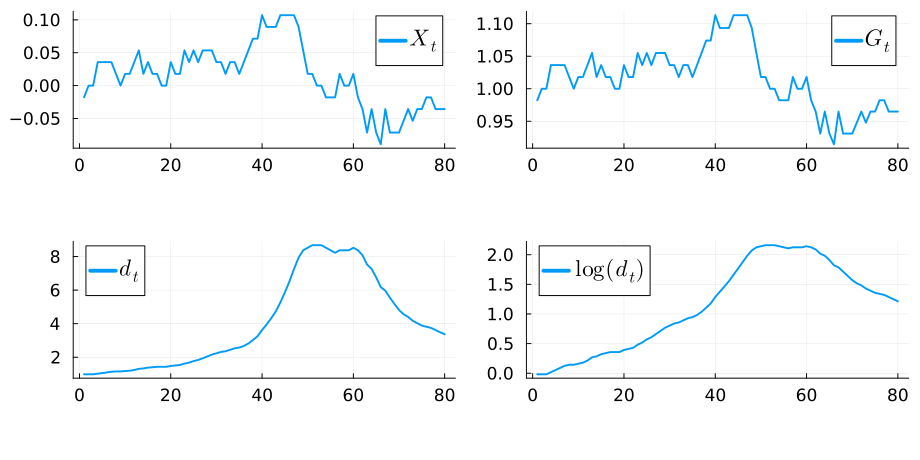

In [1]:
n = 25
mc = tauchen(n, 0.96, 0.02)
sim_length = 80
X_0_ind = 12
X_t = simulate(mc, sim_length; init = X_0_ind)
G_t = exp.(X_t)
d_0 = 1
d_t = d_0 * cumprod(G_t) 

series = [X_t G_t d_t log.(d_t)]
labels = [L"X_t" L"G_t" L"d_t" L"\log(d_t)"]
plot(series; layout = 4, labels)

## Price-Dividend Ratios for Risk-Neutral Assets


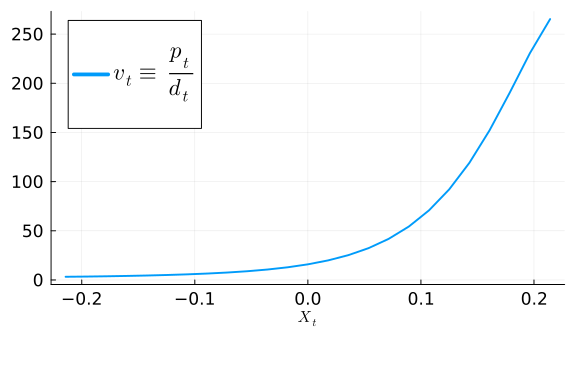

In [1]:
beta = 0.9
x = mc.state_values
G_x = exp.(x)
K = mc.p .* G_x'
v = (I - beta * K) \ (beta * K * ones(n, 1))

plot(x, v; xlabel = L"X_t",
     label = L"v_t \equiv \frac{p_t}{d_t}",
     size = (600, 400))

## Price-Dividend Ratios for Risk-Neutral Assets


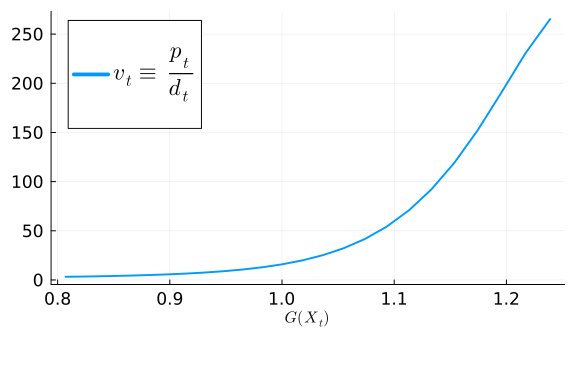

In [1]:
plot(G_x, v; xlabel = L"G(X_t)",
     label = L"v_t \equiv \frac{p_t}{d_t}",
     size = (600, 400))

## Conditional Expectation of $G_{t+1}$ given $G_t$


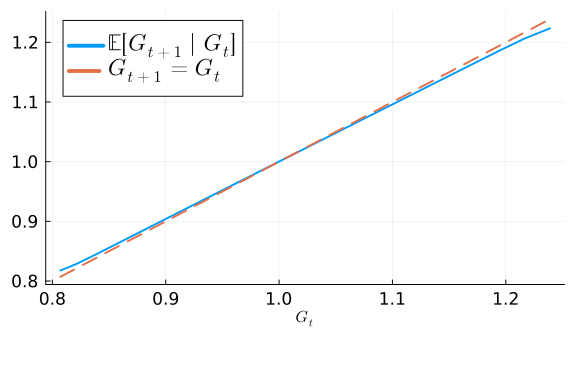

In [1]:
E_G_tp1 = mc.p * G_x

# Plot the conditional expectation
plot(G_x, E_G_tp1; xlabel = L"G_t",
     label = L"\mathbb{E}[G_{t+1} \mid G_t]",
     size = (600, 400))
plot!(G_x, G_x; label = L"G_{t+1} = G_t",
      linestyle = :dash)

## Interpretation

-   Remember that $m_{t+1} = \beta$, so this is not driven by the SDF or the correlation between the SDF and the dividend process
-   Why does the price-dividend ratio increase with the state?
    -   The Markov process is positively correlated, so high current states suggest high future states
    -   Moreover, dividend growth is increasing in the state, which is persistent
-   Hence, high future dividend growth leads to a high price-dividend ratio

## Risk-Neutral with Less Correlation


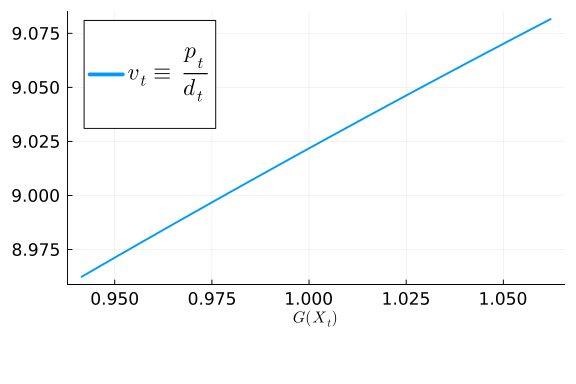

In [1]:
mc = tauchen(n, 0.1, 0.02)
x = mc.state_values
G_x = exp.(x)
K = mc.p .* G_x'
v = (I - beta * K) \ (beta * K * ones(n, 1))
plot(G_x, v; xlabel = L"G(X_t)",
     label = L"v_t \equiv \frac{p_t}{d_t}",
     size = (600, 400))

## Conditional Expectation of $G_{t+1}$ given $G_t$


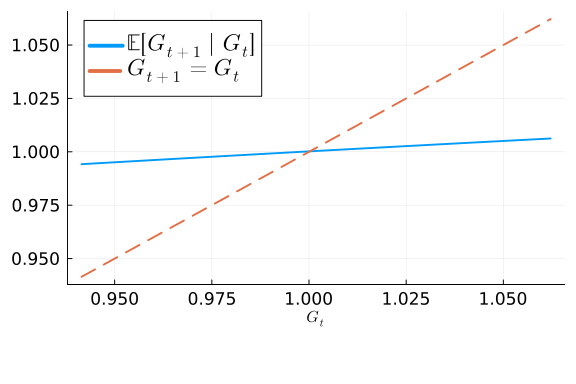

In [1]:
E_G_tp1 = mc.p * G_x

# Plot the conditional expectation
plot(G_x, E_G_tp1; xlabel = L"G_t",
     label = L"\mathbb{E}[G_{t+1} \mid G_t]",
     size = (600, 400))
plot!(G_x, G_x; label = L"G_{t+1} = G_t",
      linestyle = :dash)

# Risk Averse Examples

## Pricing with CRRA and Lucas Tree SDF

-   Utility: $u(c) = \frac{c^{1-\gamma}-1}{1 - \gamma} \ {\rm with} \ \gamma > 0$

    -   Then $u'(c) = c^{-\gamma}$, nesting $\log$ utility if $\gamma = 1$

-   With complete market, $d_t = c_t$ and the SDF is

    $$
    m_{t+1} = \beta \frac{u'(c_{t+1})}{u'(c_t)} = \beta \left(\frac{c_{t+1}}{c_t}\right)^{-\gamma} = \beta G_{t+1}^{-\gamma}
    $$

## Price-Dividend Ratio for CRRA

-   Substitute this into the formula for the price-to-dividend ratio

    $$
    \begin{aligned}
    v(X_t) &= \beta {\mathbb E}_t
    \left[
        G(X_{t+1})^{-\gamma}G(X_{t+1}) (1 + v(X_{t+1}) )
    \right]\\
    v_i &= \beta \sum_{j = 1}^N G(x_j)^{1-\gamma} (1 + v_j) P_{ij}
    \end{aligned}
    $$

-   Rearranging as a fixed point with $J_{ij} \equiv G(x_j)^{1-\gamma} P_{ij}$ $$
    \begin{aligned}
    v &= \beta J ({\mathbb 1} + v )\\
    v &= (I - \beta J)^{-1} \beta J {\mathbb 1}
    \end{aligned}
    $$

## Implementation

In [1]:
function asset_pricing_model(; beta = 0.96, gamma = 2.0, G = exp,
                         mc = tauchen(25, 0.9, 0.02))
    G_x = G.(mc.state_values)
    return (; beta, gamma, mc, G, G_x)
end
# price/dividend ratio of the Lucas tree
function tree_price(ap)
    (; beta, mc, gamma, G) = ap
    P = mc.p
    y = mc.state_values'
    J = P .* G.(y) .^ (1 - gamma)
    @assert maximum(abs, eigvals(J)) < 1 / beta # check stability
    v = (I - beta * J) \ sum(beta * J, dims = 2)
    return v
end

## Price-Dividend for Various Risk-Aversion Parameters


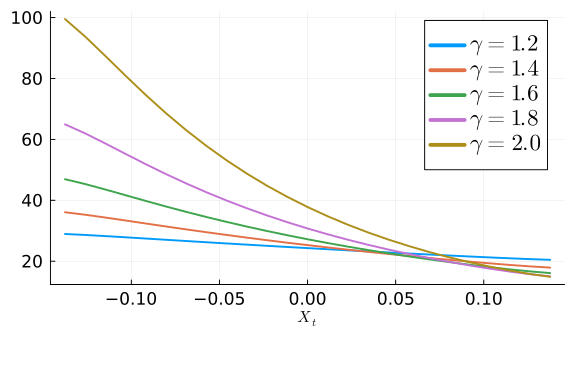

In [1]:
gammas = [1.2, 1.4, 1.6, 1.8, 2.0]
p = plot(; xlabel = L"X_t", size=(600,400))

for gamma in gammas
    ap = asset_pricing_model(; gamma)
    X = ap.mc.state_values
    plot!(X, tree_price(ap);
         label = L"\gamma = %$gamma")
end
p

## Price-Dividend for Various Risk-Aversion Parameters


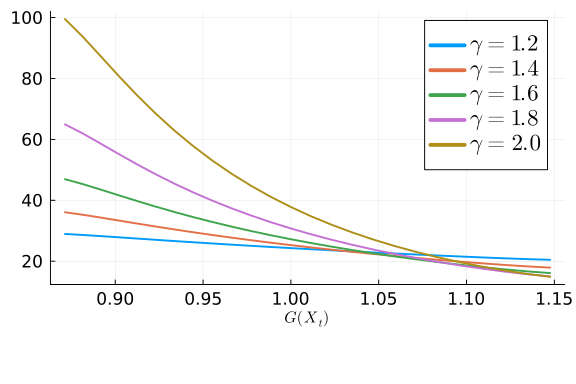

In [1]:
gammas = [1.2, 1.4, 1.6, 1.8, 2.0]
p = plot(; xlabel = L"G(X_t)", size=(600,400))
for gamma in gammas
    ap = asset_pricing_model(; gamma)
    X = ap.mc.state_values
    plot!(exp.(X), tree_price(ap);
         label = L"\gamma = %$gamma")
end
p

## Interpretation

-   Keep in mind that this is with perfectly correlated $m_{t+1}$ and $d_{t+1}$
-   Notice that $v$ is decreasing in each case, in contrast to the risk-neutral case
-   This is because, with a positively correlated state process, higher states suggest higher future consumption growth.
-   In the stochastic discount factor, higher growth decreases the discount factor, lowering the weight placed on future returns
-   Special cases:
    -   If $\gamma = 1$ then the $v$ is constant, as the forces exactly cancel
    -   If $\gamma = 0$ then the $v$ nests the risk-neutral case

## A Risk-Free Consol

-   A risk-free consol pay a constant amount, a fixed coupon each period forever
-   Asset has
    -   $\zeta$ in period $t+1$ (i.e., $d_{t+1} = \zeta$)
    -   the right to sell the claim for $p_{t+1}$ next period

    $$
    \begin{aligned}
    p_t &= \mathbb{E}_t \left[ m_{t+1}  ( \zeta + p_{t+1} ) \right]\\
    p_t &= {\mathbb E}_t \left[ \beta G_{t+1}^{-\gamma}  ( \zeta + p_{t+1} ) \right]\\
    p_i &= \beta \sum_{j = 1}^N  G(X_j)^{-\gamma} (\zeta + p_j) P_{ij}
    \end{aligned}
    $$

## Linear System

-   Letting $M_{ij} \equiv P_{ij} G(X_j)^{-\gamma}$ and rewriting in vector notation yields the solution

    $$
    p = (I - \beta M)^{-1} \beta M \zeta {\mathbb 1}
    $$

## Implementation

In [1]:
function consol_price(ap, zeta)
    (; beta, gamma, mc, G) = ap
    P = mc.p
    y = mc.state_values'
    M = P .* G.(y) .^ (-gamma)
    @assert maximum(abs, eigvals(M)) < 1 / beta

    # Compute price
    return (I - beta * M) \ sum(beta * zeta * M, dims = 2)
end

## Consol Price


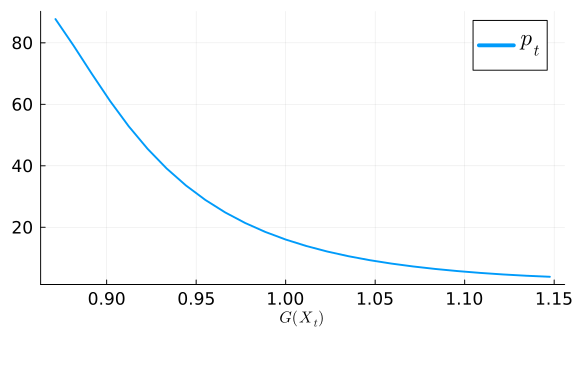

In [1]:
ap = asset_pricing_model(; beta = 0.9)
zeta = 1.0
strike_price = 40.0

x = ap.mc.state_values
G_x = exp.(x)
p = consol_price(ap, zeta)
plot(G_x, p; xlabel = L"G(X_t)",
     label = L"p_t",
     size = (600, 400))

## Expected SDF


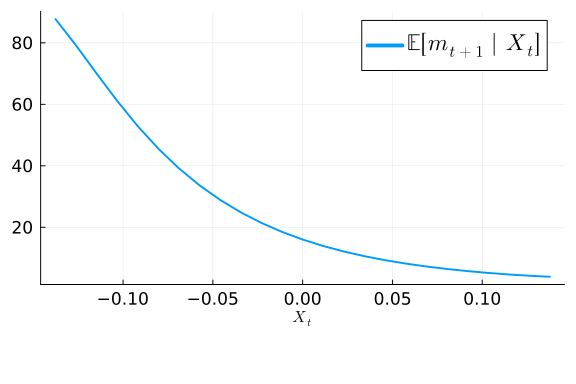

In [1]:
m_x = beta * G_x.^(-ap.gamma)
E_m_x = ap.mc.p * m_x
plot(x, p; xlabel = L"X_t",
     label = L"\mathbb{E}[m_{t+1} \mid X_t]",
     size = (600, 400))

## Expected SDF


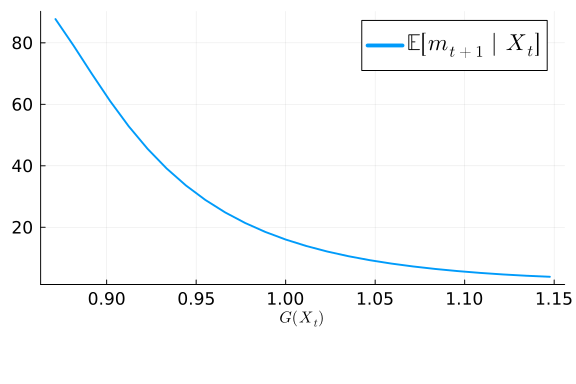

In [1]:
plot(G_x, p; xlabel = L"G(X_t)",
     label = L"\mathbb{E}[m_{t+1} \mid X_t]",
     size = (600, 400))

# Option Pricing

## Pricing an Option to Purchase the Consol

-   An option is a contract that gives the owner the right, but not the obligation, to buy or sell an asset at a specified price
-   Many problems in macro are isomorphic to option-pricing problems
    -   e.g.firm entry/exit decisions
-   Consider an option to purchase a consol at a price $p_S$
    -   This will never expire (infinite horizon, or “perpetual” option)
    -   The “call” option gives the owner the right to buy the asset
    -   The price $p_S$ is called the **strike price**
-   Let the dynamics of the console be driven by the SDF $m_{t+1}$ and the growth process $G_{t+1}$

## Exercising an Option

-   Let $w(X_t, p_S)$ be the value of the option given known $X_t$ but *before* the owner has decided whether or not to exercise the option
    -   Discounts with the SDF $m(X_{t+1})$
-   $p(X_t)$ remains the price of the consol itself
-   Bellman equation is $$
    w(X_t, p_S)
    = \max \left\{
        {\mathbb E}_t\left[m(X_{t+1}) w(X_{t+1}, p_S)\right], \;
            p(X_t) - p_S
    \right\}
    $$
    -   Left term is value of waiting, right is exercising now.

## Option Pricing with Finite State Markov Process

-   Using our SDF process

    $$
    w(x_i, p_S)
    = \max \left\{
        \beta \sum_{j = 1}^N P_{ij} G(X_j)^{-\gamma}
        w (x_j, p_S), \;
        p(x_i) - p_S
    \right\}
    $$

-   If we define $M_{ij}\equiv P_{ij} G(X_j)^{-\gamma}$ and stack prices then

    $$
    w = \max \{ \beta M w, \; p - p_S {\mathbb 1} \}
    $$

## Fixed Point

-   To solve this problem, define an operator $T$ mapping vector $w$ into vector $T(w)$ via

    $$
    T(w)
    = \max \{ \beta M w,\; p - p_S {\mathbb 1} \}
    $$

    -   To solve this, we can find the fixed point of $T(w) = w$
    -   Also a linear complementarity problem in this case

## Implementation

In [1]:
# price of perpetual call on consol bond
function call_option(ap, zeta, p_s)
    (; beta, gamma, mc, G) = ap
    P = mc.p
    y = mc.state_values'
    M = P .* G.(y) .^ (-gamma)
    @assert maximum(abs, eigvals(M)) < 1 / beta
    p = consol_price(ap, zeta)

    # Operator for fixed point, using consol prices
    T(w) = max.(beta * M * w, p .- p_s)
    sol = fixedpoint(T, zeros(length(y), 1))
    converged(sol) || error("Failed to converge in $(sol.iterations) iter")
    return sol.zero
end

## Example


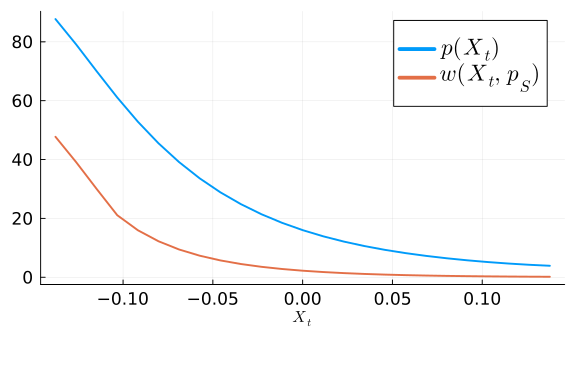

In [1]:
ap = asset_pricing_model(; beta = 0.9)
zeta = 1.0
strike_price = 40.0

x = ap.mc.state_values
p = consol_price(ap, zeta)
w = call_option(ap, zeta, strike_price)
G_x = exp.(x)

plot(x, p; xlabel = L"X_t", size=(600,400),
     label = L"p(X_t)")
plot!(x, w; label = L"w(X_t, p_S)")

## Example


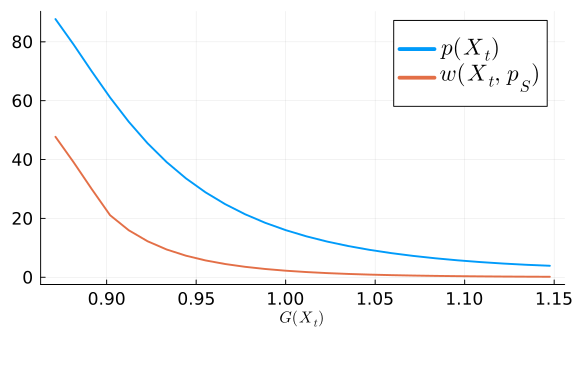

In [1]:
ap = asset_pricing_model(; beta = 0.9)
zeta = 1.0
strike_price = 40.0

x = ap.mc.state_values
p = consol_price(ap, zeta)
w = call_option(ap, zeta, strike_price)
G_x = exp.(x)

plot(G_x, p; xlabel = L"G(X_t)", size=(600,400),
     label = L"p(X_t)")
plot!(G_x, w; label = L"w(X_t, p_S)")